## Tensorflow to Read in images

This section uses tensorflow and its valuable image manipulation classes.
Also, it will probably use tf2.0

We could consider writing the jpgs out to tf records, but with 'just' 8000 images, they can probably all fit in memory.

In [0]:
import tensorflow as tf
tf.__version__

'2.0.0-dev20190404'

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from os import listdir
from os.path import isfile, join
path_to_cars_train = "/home/ben/classes/cs445/final/cars_train/"

In [0]:
def matlab_to_dict(metadata):
    dictionary = {}
    
    for row in metadata:
        #get coords for top left
        offset_height = row[1][0,0]
        offset_width = row[0][0,0]
        
        #get coord for bottom right
        max_height = row[3][0,0]
        max_width = row[2][0,0]
        
        #calculate offsets from top left to bottom right
        target_height = max_height - offset_height
        target_width = max_width - offset_width
        
        dictionary[row[5][0]] = {"offset_height": offset_height, "offset_width":offset_width,
                                "target_height":target_height, "target_width":target_width}
    
    return dictionary

In [0]:
def crop(input_tensor, metadata):
    
    #get coords for top left
    offset_height = metadata['offset_height']
    offset_width = metadata['offset_width']
    
    #calculate offsets from top left to bottom right
    target_height = metadata['target_height']
    target_width = metadata['target_width']
    
    #call the tensorflow crop function.
    cropped = tf.image.crop_to_bounding_box(input_tensor, offset_height, offset_width,
                                           target_height, target_width)
    return cropped

In [0]:
def make_batches(array, batch_size = 1000):
    
    

In [0]:
car_train_files = [f for f in listdir(path_to_cars_train ) if isfile(join(path_to_cars_train , f))]
#car_train_files

In [0]:
import data_management

In [0]:
Xtrain, Ttrain, Xtest, Ttest = data_management.read_and_partition_data()

In [0]:
Xtrain.shape, Xtest.shape

((6515,), (1629,))

In [0]:
Ttrain.shape, Ttest.shape

((6515, 1), (1629, 1))

In [0]:
Ttrain[0], Xtrain[0]

(array(['Volkswagen Golf Hatchback 2012'], dtype='<U54'),
 (array([[82]], dtype=uint8), array([[91]], dtype=uint8), array([[480]], dtype=uint16), array([[291]], dtype=uint16), array([[190]], dtype=uint8), array(['05679.jpg'], dtype='<U9')))

Parse all the tensors, absolutely devours ram.

In [0]:
batch1 = Xtrain[:1000] # choose smallish batch size, too big and it will run out of mem. 
batch1 = matlab_to_dict(batch1)
batch1_targets = Ttrain[:1000]
#batch1.keys()

In [0]:
#choosen below, mix between median and mean of image dimensions.
height = 275
width = 550

In [0]:
parsed_tensors = []

for key in batch1.keys():
    
    #Get the raw image using the key as a file name
    raw_image = tf.io.read_file(path_to_cars_train + key)

    #Decode that image as a jpeg
    jpeg_image = tf.io.decode_jpeg(raw_image, name = key.split('.')[0])
    
    #crop the image to the car 
    jpeg_image = crop(jpeg_image, batch1[key])
    
    #pad it to the average h and w from above
    jpeg_image = tf.image.resize_with_pad(jpeg_image, height, width, antialias=True)
    
    #Add to the tensor list
    parsed_tensors.append(jpeg_image)

print("Parsed {} tensors!".format(len(parsed_tensors)))

Parsed 1000 tensors!


In [0]:
def image_to_numpy(input_image):
    

Show some example images to see if parsing process gets clean images.

['Aston Martin Virage Convertible 2012']


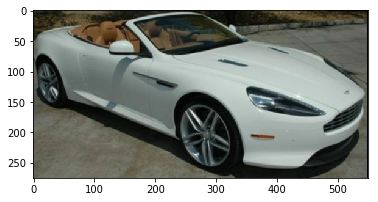

['Audi TT Hatchback 2011']


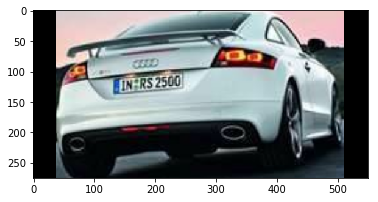

['Ford Freestar Minivan 2007']


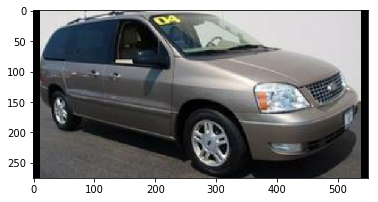

['Ford F-150 Regular Cab Truck 2007']


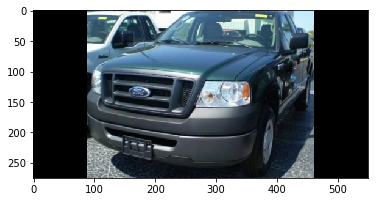

['Lamborghini Diablo Coupe 2001']


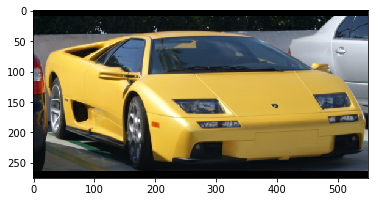

['Ford Freestar Minivan 2007']


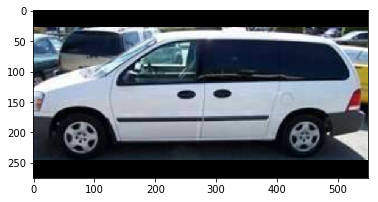

['Bentley Continental GT Coupe 2007']


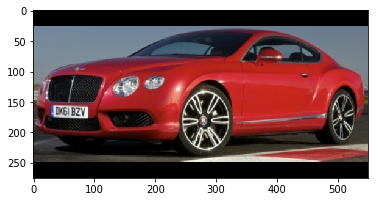

['Acura RL Sedan 2012']


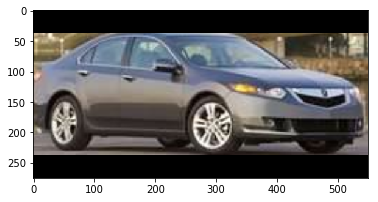

['Geo Metro Convertible 1993']


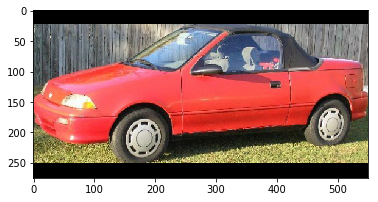

['Audi S5 Coupe 2012']


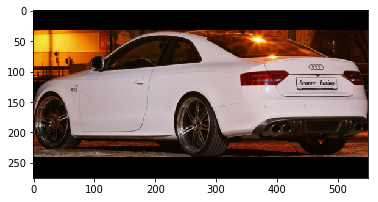

['GMC Acadia SUV 2012']


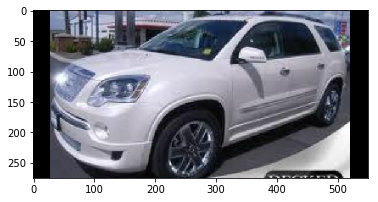

['Ford F-150 Regular Cab Truck 2007']


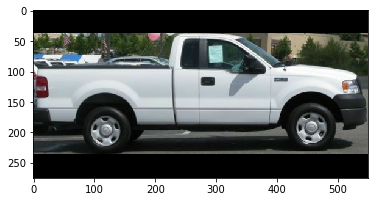

['Dodge Caravan Minivan 1997']


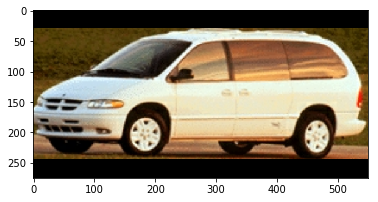

['Aston Martin V8 Vantage Convertible 2012']


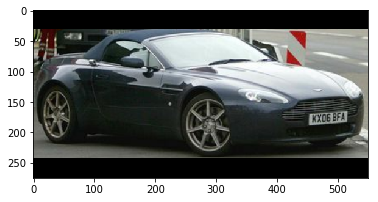

['Dodge Magnum Wagon 2008']


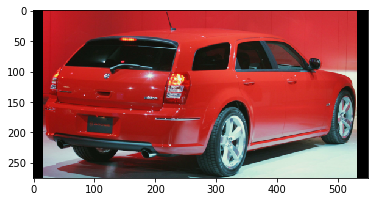

['Daewoo Nubira Wagon 2002']


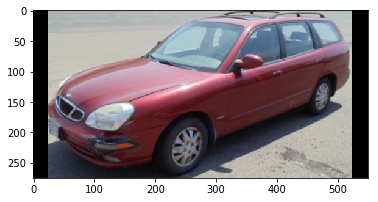

['Porsche Panamera Sedan 2012']


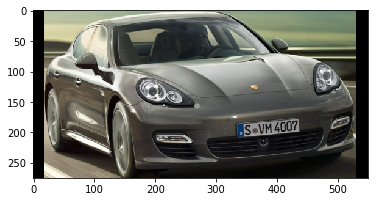

['Chevrolet Express Cargo Van 2007']


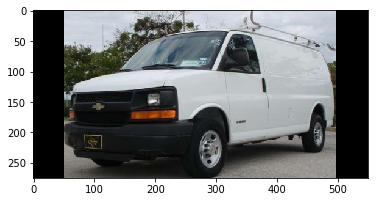

['Jaguar XK XKR Coupe 2012']


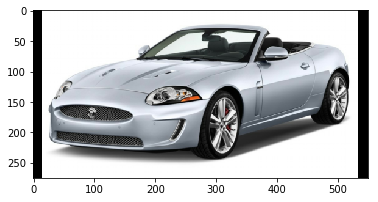

['Ford Focus Sedan 2007']


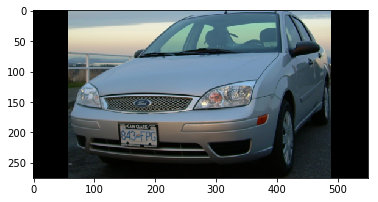

['Mazda Tribute SUV 2011']


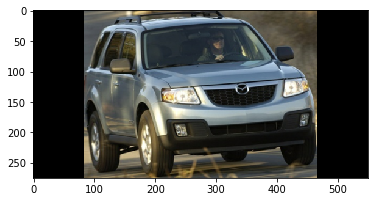

['Bentley Continental Flying Spur Sedan 2007']


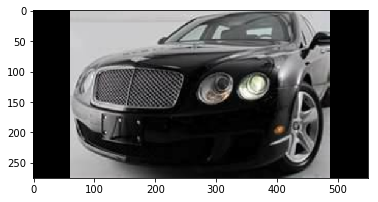

['Cadillac Escalade EXT Crew Cab Truck 2007']


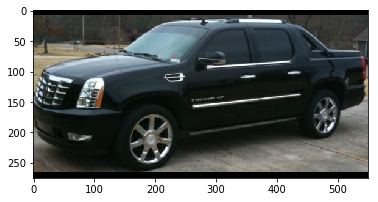

['Dodge Durango SUV 2012']


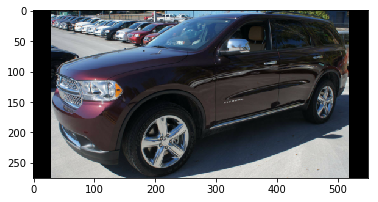

['Dodge Durango SUV 2007']


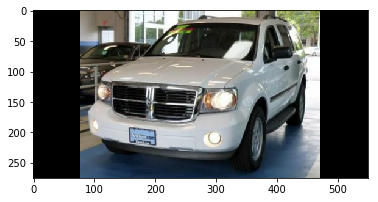

['Eagle Talon Hatchback 1998']


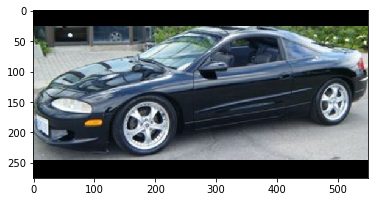

['Acura TL Sedan 2012']


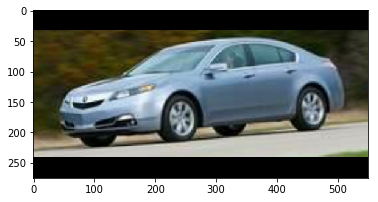

['Nissan 240SX Coupe 1998']


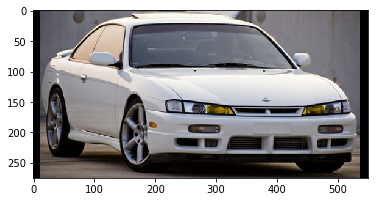

['Chevrolet Camaro Convertible 2012']


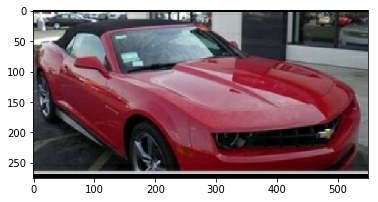

['Dodge Durango SUV 2012']


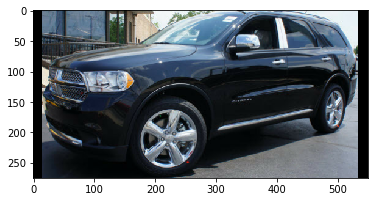

In [0]:
#fig = plt.figure(figsize=(10,10))


for i in range(20,50):
    #plt.subplot(3,3,i)
    plt.imshow(parsed_tensors[i].numpy().astype(int))
    print(batch1_targets[i])
    plt.show()

Attempt pickling

In [0]:
import pickle as pkl
numpy_batch1 = np.ones((1000, height, width, 3), dtype=np.int16) #uint8


In [0]:
for i in range(numpy_batch1.shape[0]):
    numpy_batch1[i] = parsed_tensors[i].numpy().astype(np.int16)

In [0]:
pkl.dump(numpy_batch1, open("/home/ben/classes/cs445/final/batches/batch1.pkl", "wb"))
pkl.dump(batch1_targets, open("/home/ben/classes/cs445/final/batches/batch1_targets.pkl", "wb"))

After reloading the kernel, this cell was run to test out reading those pickles

In [0]:
import pickle as pkl
numpy_batch1 = pkl.load(open("/home/ben/classes/cs445/final/batches/batch1.pkl", "rb")) #almost a GB in memory
batch1_targets = pkl.load(open("/home/ben/classes/cs445/final/batches/batch1_targets.pkl", "rb"))

['Aston Martin Virage Convertible 2012']


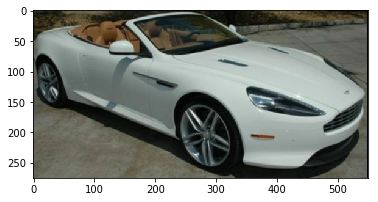

['Audi TT Hatchback 2011']


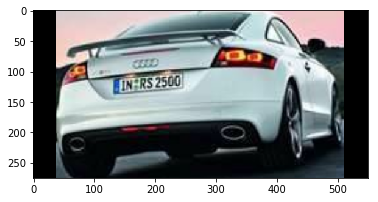

['Ford Freestar Minivan 2007']


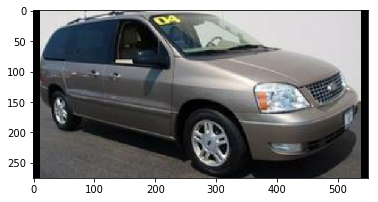

['Ford F-150 Regular Cab Truck 2007']


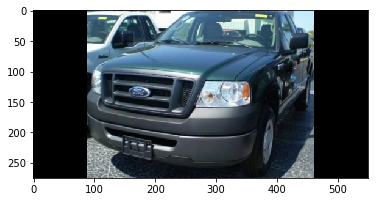

['Lamborghini Diablo Coupe 2001']


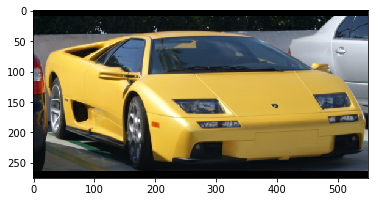

['Ford Freestar Minivan 2007']


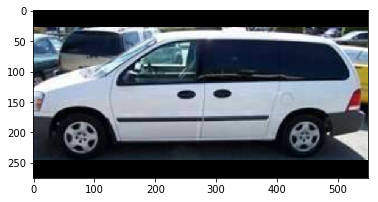

['Bentley Continental GT Coupe 2007']


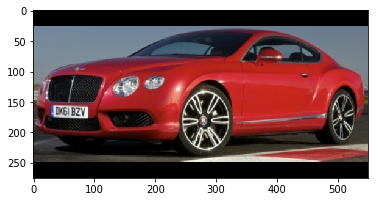

['Acura RL Sedan 2012']


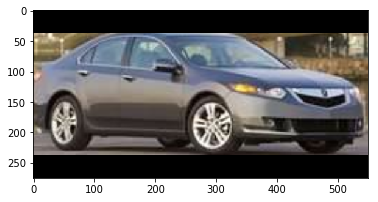

['Geo Metro Convertible 1993']


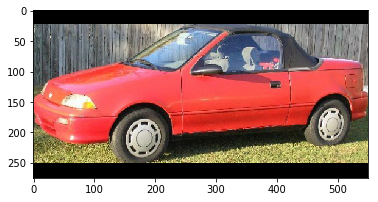

['Audi S5 Coupe 2012']


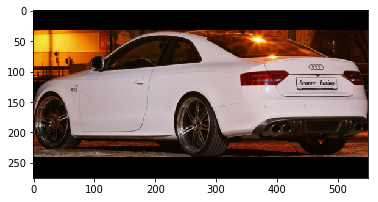

['GMC Acadia SUV 2012']


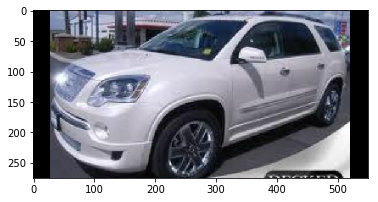

['Ford F-150 Regular Cab Truck 2007']


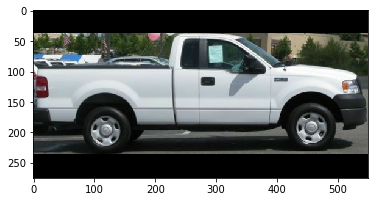

['Dodge Caravan Minivan 1997']


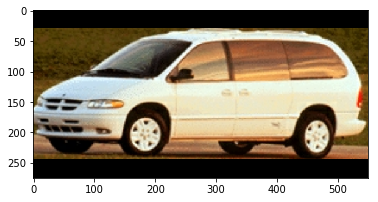

['Aston Martin V8 Vantage Convertible 2012']


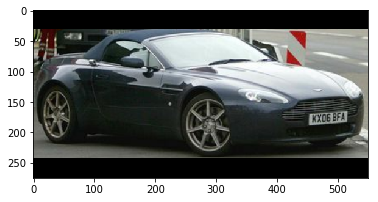

['Dodge Magnum Wagon 2008']


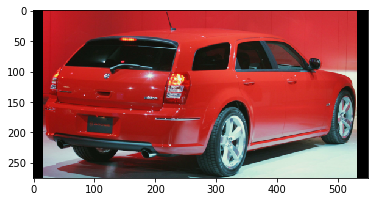

['Daewoo Nubira Wagon 2002']


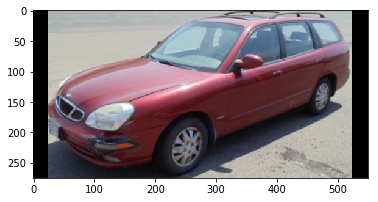

['Porsche Panamera Sedan 2012']


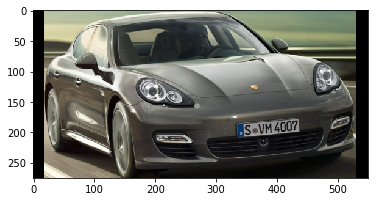

['Chevrolet Express Cargo Van 2007']


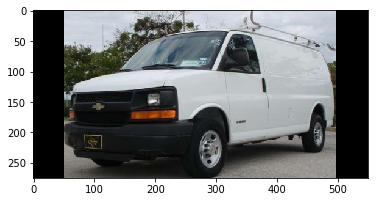

['Jaguar XK XKR Coupe 2012']


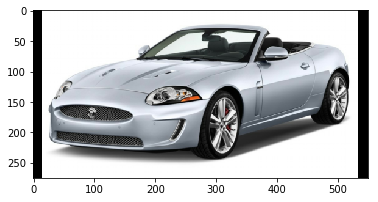

['Ford Focus Sedan 2007']


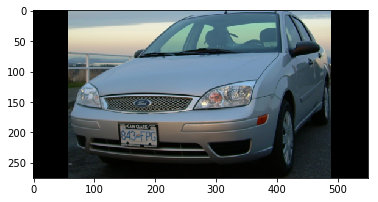

['Mazda Tribute SUV 2011']


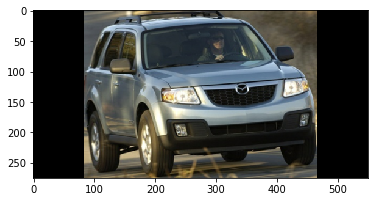

['Bentley Continental Flying Spur Sedan 2007']


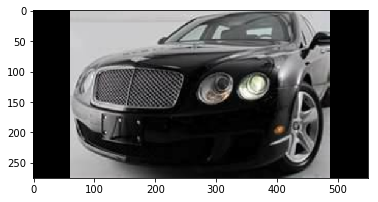

['Cadillac Escalade EXT Crew Cab Truck 2007']


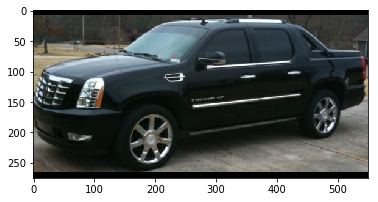

['Dodge Durango SUV 2012']


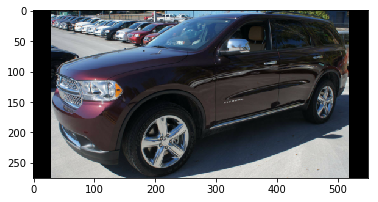

['Dodge Durango SUV 2007']


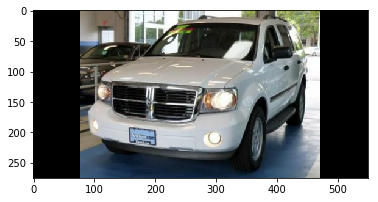

['Eagle Talon Hatchback 1998']


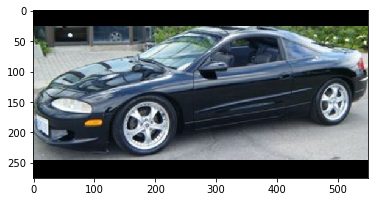

['Acura TL Sedan 2012']


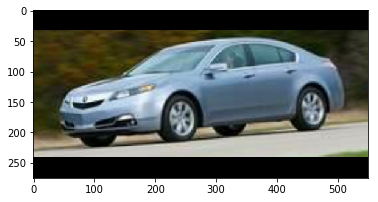

['Nissan 240SX Coupe 1998']


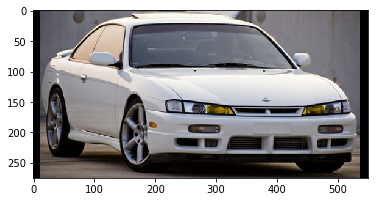

['Chevrolet Camaro Convertible 2012']


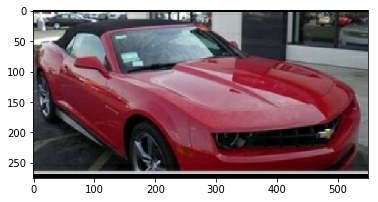

['Dodge Durango SUV 2012']


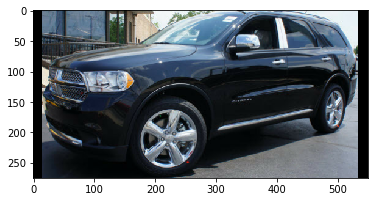

In [0]:
import matplotlib.pyplot as plt
for i in range(20,50):
    #plt.subplot(3,3,i)
    plt.imshow(numpy_batch1[i])
    print(batch1_targets[i])
    plt.show()

After the above proof of concept, here is how the code must proceed.
* load Xtrain and the rest with testing partition
* create list of batches of 1000, including around two for the testing partition
* For each batch, read in and transform all of the images.
* Then, pickle both the X and T objects, with matching names. 
* After pickling, delete all of the created objects, so that we don't run out of memory. 
* If the process fails at any point, must delete the data and start over, because partitioning is random.
  * Perhaps we could set seed on partition?

Find the mean and medians and choose a good value to pad too. 

In [0]:
# find the mean of heigt
heights = []
widths = []
for tensor in parsed_tensors:
    heights.append(tensor.shape[0])
    widths.append(tensor.shape[1])
    
np.mean(heights), np.mean(widths)

(306.6693783576362, 572.4767459708365)

In [0]:
np.median(heights), np.median(widths)

(259.0, 503.0)

In [0]:
height = 275
width = 550

In [0]:
for i in range(len(batch1)):
    old_tensor = parsed_tensors[i]
    parsed_tensors[i] = tf.image.resize_with_pad(old_tensor, 450, 650, antialias=True)
    del(old_tensor)#needed to avoid resource exhaustion

In [0]:
def max_h(tensor):
    return tensor.shape[0]
def max_w(tensor):
    return tensor.shape[1]
heightliest = max(parsed_tensors, key = max_h)
widthliest = max(parsed_tensors, key = max_w)
heightliest.shape, widthliest.shape

(TensorShape([2775, 3699, 3]), TensorShape([2775, 3699, 3]))

In [0]:
#heightliest

In [0]:
least_heightliest = min(parsed_tensors, key = max_h)
least_widthliest = min(parsed_tensors, key = max_w)
least_heightliest.shape, least_widthliest.shape

(TensorShape([57, 101, 3]), TensorShape([58, 78, 3]))

So the distribution is slightly skewed high, we'll use 450, 650 as a nice compromise size. almost all will have padding of some sort. 

In [0]:
parsed_tensors[10].shape

TensorShape([450, 650, 3])

In [0]:
sample_file = car_train_files[0]

#read data into raw tensor
raw_image = tf.io.read_file(path_to_cars_train + sample_file)

jpeg_image = tf.io.decode_jpeg(raw_image)
jpeg_image.shape

TensorShape([200, 250, 3])

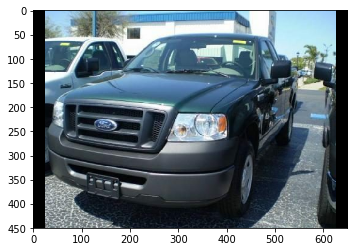

In [0]:
plt.imshow(parsed_tensors[12].numpy().astype(int))

In [0]:
Xtrain[0]

(array([[206]], dtype=uint8), array([[135]], dtype=uint8), array([[1543]], dtype=uint16), array([[1076]], dtype=uint16), array([[149]], dtype=uint8), array(['02151.jpg'], dtype='<U9'))

minxmaxxminymaxy

In [0]:
sample_file = car_train_files[3566]

#read data into raw tensor
raw_image = tf.io.read_file(path_to_cars_train + sample_file)

jpeg_image = tf.io.decode_jpeg(raw_image)
jpeg_image.shape

TensorShape([1280, 1920, 3])

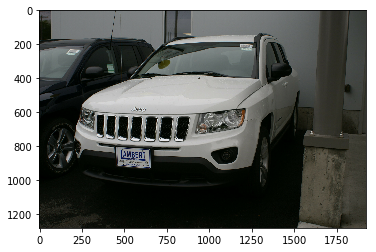

In [0]:
plt.imshow(jpeg_image.numpy())

In [0]:
jeep_meta = Xtrain[0]
jeep_meta[3][0,0]

1076

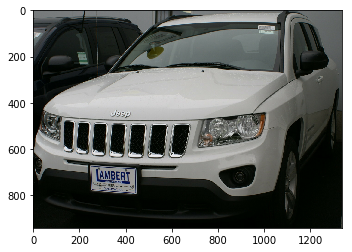

In [0]:
cropped = tf.image.crop_to_bounding_box(jpeg_image, 135, 206, 1076 - 135, 1543 - 206)
plt.imshow(cropped.numpy())

Try again

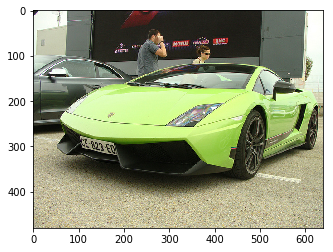

In [0]:
sample = Xtrain[10]
index = car_train_files.index(sample[5][0])

sample_file = car_train_files[index]
raw_image = tf.io.read_file(path_to_cars_train + sample_file)

jpeg_image = tf.io.decode_jpeg(raw_image)
plt.imshow(jpeg_image)

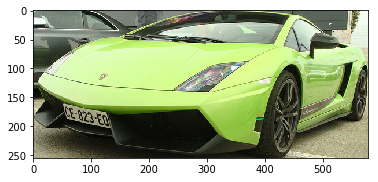

In [0]:
cropped = crop(jpeg_image, sample)
plt.imshow(cropped)

In [0]:
sample[5][0]

'02083.jpg'

In [0]:
import imp

In [0]:
imp.reload(data_management)

<module 'data_management' from '/home/ben/classes/cs445/final/data_management.py'>

In [0]:
car_train_files.index("02151.jpg")

3566